# NLP with spaCy

This Notebook is divided into three sections: 

__Section 1__ will introduce spaCy

__Section 2__ will use spaCy on Hansard debates tagged with the speaker "Gladstone." Like [Klein's Notebook](https://github.com/laurenfklein/emory-qtm340/blob/master/notebooks/class11-nlp-spacy-complete.ipynb) we will: 1) extract words; 2) extract parts-of-speech; and 3) extract syntactic units.

__Section 3__ contains your assignment. You will be asked to reiterate the same steps on Bob Dole's speeches from the Stanford Congressional Records. Section 3 will walk you through the process of aggregating and parsing the data, but it will be up to you to extract words, parts-of-speech, and syntactic units. After extracting words, parts-of-speech, and syntactic units you will be tasked with generating a few visualizations that tells us about the language usage.

## Section 1: What is spaCy?

spaCy is a comprehensive, industrial-grade software library for natural language processing (NLP). It provides tools to extract language patterns. From a linguistic standpoint, spaCy outperforms popular tools like NLTK because spaCy offers advanced statistical language models from which it parses and tags words.

spaCy's NLP pipeline is shown below. Provided with text, spaCy can tokenize, tag, parse, perform named entity recognition, and more.

The pipeline returns a parsed Doc object.

<img src="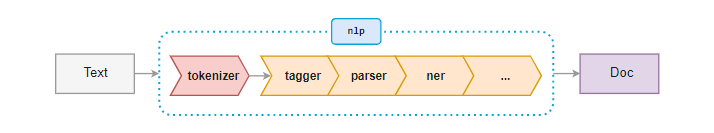
">

spaCy's linguistic features include:

1. Syntactic dependency parsing </br>
Syntax is the ordering from which words derive meaning within a sentence. After parsing words' syntactic dependencies, analysts can reconstruct grammatical rules for the purpose of extracting parts-of-speech.

2. Part-of-speech tagging </br>
Parts-of-speech are lexical categories that corresponds with a word's syntactic function--categories like "adjective" or "verb." spaCy tags parts-of-speech using a statistical model to predict which tag should most likely appear in a given context.

3. Rule-based morphology </br>
Morphology refers to word form and how different forms relate to other words in a sentence. Consider the verbs "write" and "writing" in the following sentences:</br>
 `"I write programs."` </br>
 `"I am writing a program."`</br>
The verb in the first sentence is in its base form. The verb in the second sentence is in its inflectional form. It is important to note that inflectional forms do not change a word's part-of-speech. Morphology is important to the process of lemmatization, or transforming words to their base form. Lemmatizing words before measuring them can streamline our results so words like "rent" and "rented" are not counted separately.

4. Tokenization </br>
Tokenization is the process of splitting texts into meaningful segments like n-grams. spaCy has tokenization support for over 59 languages.

5. Entity Extraction </br>
spaCy offers entity recognition for a variety of named and numeric entities including locations, person names, and organizations. Users can also add their own classes of entities.

## Section 2: Extracting Parts-of-Speech from Hansard

First import the required modules:

In [2]:
import pandas as pd, spacy, warnings; warnings.simplefilter('ignore')

Then load the language model you will use to parse the data. 

> Note: Klein uses the language model `'en'` (for English) whereas our Python environment uses `'en_core_web_sm'` (for a somewhat smaller language model). 

In [3]:
nlp = spacy.load('en_core_web_sm')

Read in the data, debates tagged with the speaker "Gladstone."

In [4]:
gladstone = pd.read_csv('/scratch/group/history/hist_3368-jguldi/gladstone_speeches.csv')

In [5]:
gladstone

,sentence_id,speaker,text,speechdate
0,S3V0015P0_14408,Mr. Gladstone,"said, the Reform Bill had not produced at Live...",1833-02-21
1,S3V0015P0_14409,Mr. Gladstone,"He would venture to say, however, that no corr...",1833-02-21
2,S3V0015P0_14414,Mr. Gladstone,"said, that no such practices had taken place, ...",1833-02-21
3,S3V0016P0_6834,Mr. Gladstone,"stated, that from a letter he had received, he...",1833-03-06
4,S3V0026P0_7706,Mr. Gladstone,was unable to say that such persons had not be...,1835-02-27
...,...,...,...,...
10134,S3V0082P0_9537,Mr. Gladstone,"Upon the whole, here was a mass of circumstant...",1845-07-15
10135,S3V0082P0_9538,Mr. Gladstone,The obligation of these Treaties—and he wished...,1845-07-15
10136,S3V0082P0_9539,Mr. Gladstone,"And, lastly, notwithstanding the disadvantage ...",1845-07-15
10137,S3V0082P0_9540,Mr. Gladstone,He had not knowingly passed by any fact bearin...,1845-07-15


`gladstone` is a DataFrame with four columns and 10139 rows. We could parse the data in this form, however, parsing time is relative to the size of the data we are weilding. Reducing the data to just the components we need will accelerate our work. The following code makes a copy of just the `text` column from `gladstone`.

In [6]:
gladstone_small = gladstone['text'].copy()

In [7]:
gladstone_small

0        said, the Reform Bill had not produced at Live...
1        He would venture to say, however, that no corr...
2        said, that no such practices had taken place, ...
3        stated, that from a letter he had received, he...
4        was unable to say that such persons had not be...
                               ...                        
10134    Upon the whole, here was a mass of circumstant...
10135    The obligation of these Treaties—and he wished...
10136    And, lastly, notwithstanding the disadvantage ...
10137    He had not knowingly passed by any fact bearin...
10138    I did not say that that demand was made under ...
Name: text, Length: 10139, dtype: object

`gladstone_small` doesn't look like a pandas DataFrame. Invoking `type()` on `gladstone_small` shows that it is a pandas series. The number on the left is the sentence's index, and the text on the right is the debate text. A series is generally lighter weight than a DataFrame of the same data.

In [8]:
type(gladstone_small)

pandas.core.series.Series

Now that we have a smaller data set, let's parse the text with spaCy. 

> Note: Klein just uses `nlp()` because she is parsing a single element, or a single unit of data. We need to iterate through multiple rows with multiple elements, which can be done using `nlp.pipe()` instead.

In [9]:
%%time
gladstone_doc = list(nlp.pipe(gladstone_small, disable = ["ent"]))

CPU times: user 30.3 s, sys: 4.87 s, total: 35.2 s
Wall time: 35.3 s


Let's inspect the ouput, `gladstone_doc`:

In [10]:
gladstone_doc[:10]

[said, the Reform Bill had not produced at Liverpool the effect which had been anticipated from it.,
 He would venture to say, however, that no corrupt influence had been used either by the noble Lord or by any of his supporters during his last election.,
 said, that no such practices had taken place, to the best of his belief.,
 stated, that from a letter he had received, he believed the petition to be signed by many respectable individuals, and that it should have his support.,
 was unable to say that such persons had not been appointed as special Magistrates in any case.,
 Thus much, however, he could say, that no person interested in the West-India Colonies had been appointed as a special Magistrate in the Island of Jamaica.,
 It was impossible to give any absolute pledge upon the subject, because the Governor of the Colony retained, under the Act, the power of doing anything which was necessary, in his judgment, for the preservation of its peace and tranquillity.,
 It was importan

Our data no longer looks like a panda's series. Instead, as indicated by the brackets, every sentence looks like it belongs to a list. Less obvious, however, is that every word is now a generator object, in this case, a spaCy token object.

Let's see if this assessment is true by invoking `type()` on `gladstone_doc` and then on every word in `gladstone_doc`.

In [11]:
type(gladstone_doc)

list

In [12]:
type(word for word in gladstone_doc)

generator

### Words

Even though these generator objects look like regular character strings, they're not. They're spaCy token objects.

Therefore, unlike a string, every word has associated attributes like __.text__, __.lemma___, __.pos___ (and more) where __.text__ stands for the word as it appears in the data set, __.lemma__ refers to the lemmatized version of the word, and __.pos___ stands for part-of-speech. 

> For a full list of token object attributes and their descriptions, see the list of token attributes in [spaCy's documentation](https://spacy.io/usage/rule-based-matching#adding-patterns-attributes).

To view a token's attributes we can created a nested for loop that iterates through every list in `gladstone_doc` and every word in every list. The following code extracts the word as it appears in the data set and also shows its lemmatized form.

In [16]:
token_and_lemma = []

for ls in gladstone_doc:
    for word in ls:
        row = (word.text, word.lemma_)
        token_and_lemma.append(row)

In [17]:
token_and_lemma[:30]

[('said', 'say'),
 (',', ','),
 ('the', 'the'),
 ('Reform', 'Reform'),
 ('Bill', 'Bill'),
 ('had', 'have'),
 ('not', 'not'),
 ('produced', 'produce'),
 ('at', 'at'),
 ('Liverpool', 'Liverpool'),
 ('the', 'the'),
 ('effect', 'effect'),
 ('which', 'which'),
 ('had', 'have'),
 ('been', 'be'),
 ('anticipated', 'anticipate'),
 ('from', 'from'),
 ('it', '-PRON-'),
 ('.', '.'),
 ('He', '-PRON-'),
 ('would', 'would'),
 ('venture', 'venture'),
 ('to', 'to'),
 ('say', 'say'),
 (',', ','),
 ('however', 'however'),
 (',', ','),
 ('that', 'that'),
 ('no', 'no'),
 ('corrupt', 'corrupt')]

Many of the words in `token_and_lemma` are similar, but let's look at some important distinctions. __anticipated__ is lemmatized to __anticipate__. __been__ is lemmatized to __be__. Lemmatizing words is important if we don't want to count __anticipated__ and __anticipate__ as different words.

### Parts-of-Speech

We can also view each word's part-of-speech:

In [18]:
token_and_pos = []

for ls in gladstone_doc:
    for word in ls:
        row = (word.text, word.pos_)
        token_and_pos.append(row)

In [19]:
token_and_pos[:30]

[('said', 'VERB'),
 (',', 'PUNCT'),
 ('the', 'DET'),
 ('Reform', 'PROPN'),
 ('Bill', 'PROPN'),
 ('had', 'AUX'),
 ('not', 'PART'),
 ('produced', 'VERB'),
 ('at', 'ADP'),
 ('Liverpool', 'PROPN'),
 ('the', 'DET'),
 ('effect', 'NOUN'),
 ('which', 'DET'),
 ('had', 'AUX'),
 ('been', 'AUX'),
 ('anticipated', 'VERB'),
 ('from', 'ADP'),
 ('it', 'PRON'),
 ('.', 'PUNCT'),
 ('He', 'PRON'),
 ('would', 'VERB'),
 ('venture', 'VERB'),
 ('to', 'PART'),
 ('say', 'VERB'),
 (',', 'PUNCT'),
 ('however', 'ADV'),
 (',', 'PUNCT'),
 ('that', 'SCONJ'),
 ('no', 'DET'),
 ('corrupt', 'ADJ')]

Or extract a single type of part-of-speech. The following code iterates through every list in `gladstone_doc` and every word in every list. If the lemmatized word's part-of-speech is a noun it is appended to our empty list, `nouns`.

In [48]:
from spacy.symbols import NOUN

nouns = []

for ls in gladstone_doc:
    for word in ls:
        if word.pos_ == 'NOUN':
            nouns.append(word.lemma_)

In [49]:
nouns[:30]

['effect',
 'influence',
 'supporter',
 'election',
 'practice',
 'place',
 'belief',
 'letter',
 'petition',
 'individual',
 'support',
 'person',
 'case',
 'person',
 'magistrate',
 'pledge',
 'subject',
 'power',
 'judgment',
 'preservation',
 'peace',
 'tranquillity',
 'assent',
 'appointment',
 'matter',
 'course',
 'conduct',
 'approbation',
 'wish',
 'wish']

The following code performs the same operation for adjectives.

In [50]:
from spacy.symbols import ADJ

adjectives = []

for ls in gladstone_doc:
    for word in ls:
        if word.pos_ == 'ADJ':
            adjectives.append(word.lemma_)

In [51]:
adjectives[:30]

['corrupt',
 'noble',
 'last',
 'such',
 'good',
 'many',
 'respectable',
 'unable',
 'such',
 'special',
 'much',
 'interested',
 'special',
 'impossible',
 'absolute',
 'necessary',
 'important',
 'aware',
 'necessary',
 'full',
 'improper',
 'wise',
 'discreet',
 'adjourned',
 'long',
 'great',
 'same',
 'political',
 'high',
 'other']

While these are basic methods of extraction, they do serve as building blocks for bigger questions like: what kinds of verbs do different Congressional speakers use? Do the adjectives Congressional speakers use change over time?

Or, what adjectives do different politians use to discuss climate change? Here, an absence of adjectives would be telling, too.

### Syntactic Units

We can extract a words syntactic dependency (labeled __.dep___).

In [34]:
token_and_dep = []

for ls in gladstone_doc:
    for word in ls:
        row = (word.text, word.pos_, word.dep_)
        token_and_dep.append(row)

In [35]:
token_and_dep[:30]

[('said', 'VERB', 'ROOT'),
 (',', 'PUNCT', 'punct'),
 ('the', 'DET', 'det'),
 ('Reform', 'PROPN', 'compound'),
 ('Bill', 'PROPN', 'nsubj'),
 ('had', 'AUX', 'aux'),
 ('not', 'PART', 'neg'),
 ('produced', 'VERB', 'ccomp'),
 ('at', 'ADP', 'prep'),
 ('Liverpool', 'PROPN', 'pobj'),
 ('the', 'DET', 'det'),
 ('effect', 'NOUN', 'dobj'),
 ('which', 'DET', 'nsubjpass'),
 ('had', 'AUX', 'aux'),
 ('been', 'AUX', 'auxpass'),
 ('anticipated', 'VERB', 'relcl'),
 ('from', 'ADP', 'prep'),
 ('it', 'PRON', 'pobj'),
 ('.', 'PUNCT', 'punct'),
 ('He', 'PRON', 'nsubj'),
 ('would', 'VERB', 'aux'),
 ('venture', 'VERB', 'ROOT'),
 ('to', 'PART', 'aux'),
 ('say', 'VERB', 'xcomp'),
 (',', 'PUNCT', 'punct'),
 ('however', 'ADV', 'advmod'),
 (',', 'PUNCT', 'punct'),
 ('that', 'SCONJ', 'mark'),
 ('no', 'DET', 'det'),
 ('corrupt', 'ADJ', 'amod')]

Let's take a moment to observe these results. We don't need to be a linguistic to see that __venture__ is labeled ROOT VERB or that __anticipated__ is a verb in a relative clause, or relcl. 

> For a full list of syntactic tags, see the [English dependency labels in spaCy's documentation](https://spacy.io/api/annotation#dependency-parsing-english).

We can focus our results by extracting just subjects, or the nouns performing some sort of action. The following code uses a conditional statement (an "if" statement) to determine whether the syntactic dependency tag is __nsubj__ (for noun subject), or __nsubjpass__ for (passive noun subject). If the dependency tag is either of these, the word is cast to a string and appended to subjects.

In [40]:
subjects = []

for ls in gladstone_doc:
    for word in ls:
        if word.dep_ in ('nsubj', 'nsubjpass'):
            subjects.append(str(word))

In [41]:
subjects[:30]

['Bill',
 'which',
 'He',
 'influence',
 'practices',
 'he',
 'he',
 'petition',
 'it',
 'persons',
 'he',
 'person',
 'It',
 'Governor',
 'which',
 'It',
 'Gentleman',
 'Governor',
 'appointment',
 'conduct',
 'Nothing',
 'nothing',
 'nothing',
 'appointment',
 'it',
 'order',
 'allusions',
 'he',
 'Huskisson',
 'sixpence']

The reason we decided to cast the words to strings is because then we can perform string operations on them:

In [43]:
lowercase_subjects = [word.lower() for word in subjects]

In [45]:
lowercase_subjects[:30]

['bill',
 'which',
 'he',
 'influence',
 'practices',
 'he',
 'he',
 'petition',
 'it',
 'persons',
 'he',
 'person',
 'it',
 'governor',
 'which',
 'it',
 'gentleman',
 'governor',
 'appointment',
 'conduct',
 'nothing',
 'nothing',
 'nothing',
 'appointment',
 'it',
 'order',
 'allusions',
 'he',
 'huskisson',
 'sixpence']

Now it's your turn!

## Section 3: Extracting Parts-of-Speech from the Stanford Congressional Records

In this section we will use spaCy on Bob Dole's Congressional speeches. 

First, import the required modules:

In [3]:
import glob, os, csv, pandas as pd

After importing the modules we want to read in the Stanford Congressional Records. 

Before we can read in the data, however, we should inspect the way in which the data is stored. Unlike the __gladstone_speeches__ data, which was conveniently aggregated in a .csv file, the Stanford Congressional Records are scattered across several sub-directories and .txt files. To see what I mean, let's look at the file hierarchy for the Stanford Congressional Records:

In [8]:
directory_path_to_congress = "/scratch/group/oit_research_data/stanford_congress"

glob.glob('{}/*'.format(directory_path_to_congress))

['/scratch/group/oit_research_data/stanford_congress/__MACOSX',
 '/scratch/group/oit_research_data/stanford_congress/speakermap_stats',
 '/scratch/group/oit_research_data/stanford_congress/keywords.txt',
 '/scratch/group/oit_research_data/stanford_congress/topic_phrases.txt',
 '/scratch/group/oit_research_data/stanford_congress/congress_download.sh',
 '/scratch/group/oit_research_data/stanford_congress/vocabulary',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily',
 '/scratch/group/oit_research_data/stanford_congress/false_matches.txt',
 '/scratch/group/oit_research_data/stanford_congress/party_full',
 '/scratch/group/oit_research_data/stanford_congress/partisan_phrases',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound',
 '/scratch/group/oit_research_data/stanford_congress/audit']

As shown above, the Stanford Congressional Records includes data from __keywords__ to __partisan_phrases__. 

We are interested in the __hein-daily__ folder, which contains Congressional speech data. We can view the contents of the __hein-daily__ folder by adding it to our directory path. 

The following code shows the first 30 files in __hein-daily__.

In [10]:
directory_path_to_hein_daily = "/scratch/group/oit_research_data/stanford_congress/hein-daily"

glob.glob('{}/*'.format(directory_path_to_hein_daily))[:30]

['/scratch/group/oit_research_data/stanford_congress/hein-daily/byspeaker_2gram_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/byparty_2gram_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/byparty_2gram_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/byspeaker_2gram_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/107_SpeakerMap.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/byspeaker_2gram_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/098_SpeakerMap.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/100_SpeakerMap.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/descr_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/

There are a lot of files in here! And, at first glance many of them seem unrelated. We have files with labels that include: __2_gram__, __SpeakerMap__, __descr___, and __speeches___.

We are just interested in .txt files with the prefix __speeches___ and the prefix __descr___. 

__speeches___ contains the actual speeches recorded in Congress and __descr___ contains associated metadata like the date of the speech and the speaker. 

The following code iterates through each __speeches___ .txt file and each __descr___ .txt file and combines them into pandas DataFrames that resembles our __gladstone_speeches__ data.

Note: this code takes a few minutes to run. While it runs, it prints lines that were ommitted because of formatting or parsing errors.

In [ ]:
directory = '/scratch/group/oit_research_data/stanford_congress/hein-bound/'
file_type = 'txt'
delim ='|'

speeches_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE) for f in glob.glob(directory + "speeches_*"+file_type)])

descr_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE) for f in glob.glob(directory + "descr_*"+file_type)])

Now we have two DataFrames, one with speeches and one with metadata:

In [14]:
speeches_df

,speech_id,speech
0,740000001,The Chair lays before the Senate the credentia...
1,740000002,(John C. Crockett) proceeded to read the certi...
2,740000003,Mr. President. I suggest that credentials foun...
3,740000004,Is there objection to the request? The Chair h...
4,740000005,Secretary of State.
...,...,...
382520,940382525,Mr. Speaker. it is a great personal honor for ...
382521,940382526,Mr. Speaker. given the fact that Chairman MADD...
382522,940382527,Mr. Speaker. taie 94th Congress has officially...
382523,940382528,designateApril 24 as a National Day of Remembr...


In [15]:
descr_df

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,1110000001,H,20090106,1,The CLERK,Unknown,Unknown,Unknown,Special,66,70,01062009.txt,107,16
1,1110000002,H,20090106,2,The CLERK,Unknown,Unknown,Unknown,Special,77,100,01062009.txt,836,134
2,1110000003,H,20090106,3,The CLERK,Unknown,Unknown,Unknown,Special,565,591,01062009.txt,219,37
3,1110000004,H,20090106,4,The CLERK,Unknown,Unknown,Unknown,Special,593,613,01062009.txt,596,92
4,1110000005,H,20090106,5,The CLERK,Unknown,Unknown,Unknown,Special,616,622,01062009.txt,200,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261804,780261805,H,19441219,1345,The SPEAKER pro tempore,Unknown,Unknown,Unknown,Special,35449,35451,12191944.txt,64,11
261805,780261806,H,19441219,1346,Mr. RAMSPECK,Unknown,RAMSPECK,Unknown,M,35489,35492,12191944.txt,102,17
261806,780261807,H,19441219,1347,The SPEAKER pro tempore,Unknown,Unknown,Unknown,Special,35494,35501,12191944.txt,246,37
261807,780261808,H,19441219,1348,Mr. ANDERSON of New York,Unknown,ANDERSON,New York,M,35520,35540,12191944.txt,751,118


For the sake of analysis, let's merge these into a single DataFrame where the speakers in the speaker column relate to the text in the speech column, and so forth.

The following code merges the two DataFrames by the `speech_id` column (a unique identifier) and also replaces any null values (NAs) with zeros.

In [12]:
all_data = pd.merge(speeches_df, descr_df, on='speech_id').fillna(0)

In [13]:
all_data

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,740000001,The Chair lays before the Senate the credentia...,S,19350103,1,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,48,51,01031935.txt,184,32
1,740000002,(John C. Crockett) proceeded to read the certi...,S,19350103,2,The Chief Clerk,Unknown,Unknown,Unknown,Special,52,54,01031935.txt,124,21
2,740000003,Mr. President. I suggest that credentials foun...,S,19350103,3,Mr. ROBINSON,Unknown,ROBINSON,Unknown,M,55,57,01031935.txt,153,30
3,740000004,Is there objection to the request? The Chair h...,S,19350103,4,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,58,62,01031935.txt,238,44
4,740000005,Secretary of State.,S,19350103,5,Mrs. MARGUERITE P. BACA,MARGUERITE P.,BACA,Unknown,F,273,275,01031935.txt,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394636,940382525,Mr. Speaker. it is a great personal honor for ...,E,19761001,4819,Mr. BIAGGI,Unknown,BIAGGI,Unknown,M,383002,383082,10011976.txt,2782,453
17394637,940382526,Mr. Speaker. given the fact that Chairman MADD...,E,19761001,4820,Mr. PHILLIP BURTON,PHILLIP,BURTON,Unknown,M,383088,383104,10011976.txt,337,60
17394638,940382527,Mr. Speaker. taie 94th Congress has officially...,E,19761001,4821,Mr. JOHNSON of California,Unknown,JOHNSON,California,M,383111,383127,10011976.txt,586,102
17394639,940382528,designateApril 24 as a National Day of Remembr...,E,19761001,4822,For.-......To,Unknown,......TO,Unknown,M,383248,383342,10011976.txt,6066,892


`all_data` is a large DataFrame. To make analysis more accessible, let's take a subset of the data.

A subset is a portion of the data made up of criteria of our choosing. The following code takes a subset of just speeches by Mr. Dole.

In [16]:
bob_dole = all_data[(all_data.speaker == "Mr. DOLE")].copy()

In [17]:
bob_dole

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
617680,970000180,Mr. President. despite all the debate over tax...,S,19810105,180,Mr. DOLE,Unknown,DOLE,Unknown,M,3410,3425,01051981.txt,602,107
617687,970000187,Mr. President. I send to the desk a bill to cl...,S,19810105,187,Mr. DOLE,Unknown,DOLE,Unknown,M,6423,6427,01051981.txt,147,25
617689,970000189,Mr. President. today I am introducing legislat...,S,19810105,189,Mr. DOLE,Unknown,DOLE,Unknown,M,6880,6890,01051981.txt,409,60
617690,970000190,Mr. President. one of the most pressing and se...,S,19810105,190,Mr. DOLE,Unknown,DOLE,Unknown,M,7015,7022,01051981.txt,297,47
617692,970000192,Mr. President. the Senator from Kansas today w...,S,19810105,192,Mr. DOLE,Unknown,DOLE,Unknown,M,7582,7662,01051981.txt,2657,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17392087,940379976,Mr. President. I rise to pay tribute to the re...,S,19761001,2270,Mr. DOLE,Unknown,DOLE,Unknown,M,161175,161210,10011976.txt,1285,222
17392088,940379977,Mr. President. I am particularly appreciative ...,S,19761001,2271,Mr. DOLE,Unknown,DOLE,Unknown,M,161212,161247,10011976.txt,1294,217
17392089,940379978,Mr. President. HIRAM FONG comes from what is g...,S,19761001,2272,Mr. DOLE,Unknown,DOLE,Unknown,M,161249,161280,10011976.txt,1161,180
17392090,940379979,Mr. President. the retirement of Senator JOHN ...,S,19761001,2273,Mr. DOLE,Unknown,DOLE,Unknown,M,161282,161319,10011976.txt,1403,229


Let's look at some of the obvious differences between `bob_dole` and `all_data`. For one, `all_data` consists of 17,394,641 rows whereas `bob_dole` has 49,119. This difference in size will make working with `bob_dole` much easier! 

But, let's make processing the `bob_dole` even data easier for spaCy. The following code creates a pandas series from just Dole's speeches. A series is lighter weight than a formatted DataFrame.

In [18]:
bob_dole_set = bob_dole['speech'].copy()

In [19]:
bob_dole_set

617680      Mr. President. despite all the debate over tax...
617687      Mr. President. I send to the desk a bill to cl...
617689      Mr. President. today I am introducing legislat...
617690      Mr. President. one of the most pressing and se...
617692      Mr. President. the Senator from Kansas today w...
                                  ...                        
17392087    Mr. President. I rise to pay tribute to the re...
17392088    Mr. President. I am particularly appreciative ...
17392089    Mr. President. HIRAM FONG comes from what is g...
17392090    Mr. President. the retirement of Senator JOHN ...
17392091    Mr. President. the adjournment of this session...
Name: speech, Length: 49119, dtype: object

The number on the left is an index, a unique numerical representation of a sentence's location, and the text on the right are Dole's speeches.

We can now run `nlp.pipe()` on the data. `bob_dole` is a larger variable than `gladstone_speeches`, so it will take longer to run.

Earlier we glossed over the `%%time` magic command. 

Our `%%time` magic command tells us how long a cell took to complete. The output of `%%time` consists of: user time, system time, and total time. System time is the amount of time the compuer used to calculate results. User time refers to the amount of time we spent waiting to compute. If lots of other processes are running on M2 we might have to wait longer to process our code.

In [20]:
%%time
bob_dole_doc = list(nlp.pipe(bob_dole_set, disable = ["ent"]))

CPU times: user 9min 21s, sys: 2min, total: 11min 21s
Wall time: 11min 26s


Now it's your turn to take away the rest!

## Assignment

From Bob Dole's speeches:
 - extract words and their lemmatized forms
 - extract words and their parts-of-speech
 - extract nouns
 - extract adjectives
 - extract verbs (our examples only extracted adjectives and nouns, but can you extract verbs?)
 - extract subjects
 - extract objects (this will require following the link to the spaCy documentation and seeing for yourself how objects are tagged--hint: you need to find the tags for direct, indirect, and passive objects)

After extracting these different parts-of-speech and syntactic units, choose three of these variables and: 
 - count the number of unique occurances
 - visualize your count (remember to remove stop words where necessary)
 
Make a few observations about your visualizations:
 - note three things you notice (this can be as simple as "Dole often uses the verb X")
 - note three ways you could build a more sophisticated analyis from your results (for example, "I could read the debates and contextualize Dole's use of the word X")


<font color=blue>For this assingment to be considered complete you should turn in your Notebook with a) each of the extracted parts-of-speech and syntactic units (show them with __variable_name[:30]__, b) your three visulizations, and c) your observations.</font>